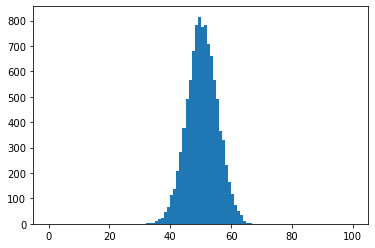

In [70]:
### Developer - Laltu Gazi, SINP

### The problem is: How will you tell a dice is biased in a toss of 100 trials. 

from scipy.stats import chi2
import numpy as np 
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt
observed_heads = 46
#p_truth = np.array([0.2])
H_0 = .5 ### It is the true value of p. For simultaneous toses of multiples coins with different levels of bias we will need an array 
H_1 = .46
number_of_trials = 100
number_exp = 10000

### generate several experiments (number_exp) and in each experiment number of trials = 100
number_of_heads = np.array(np.random.binomial(number_of_trials, H_0, number_exp))  ### number of heads/success

plt.hist(number_of_heads, bins=100,range = (0,100))
plt.show()

nbins = 40
lowrange = 0
highrange = 20

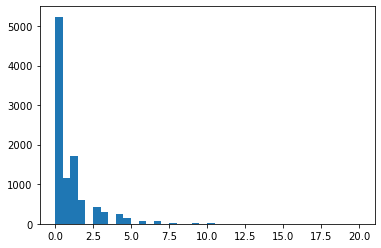

In [68]:
### parameter to test is the p parameter. 
### Take that parameter that is to be tested that maximizes for the denominator likelihood separately
### of whatever maximizes the likelihood. In the numerator its the hypothesis to be tested
### Denominator is maximized by n_successes/n_trials

L_01 = comb(number_of_trials,number_of_heads)*H_0**number_of_heads*(1-H_0)**(number_of_trials-number_of_heads)  
H_prof = number_of_heads/number_of_trials
L_1 = comb(number_of_trials,number_of_heads)*(H_prof**number_of_heads)*(1-H_prof)**(number_of_trials-number_of_heads)
λ_μ = L_01/L_1

t_μ = -2*np.log(λ_μ)
plt.hist(t_μ, bins=nbins,range = (lowrange, highrange))
plt.show()

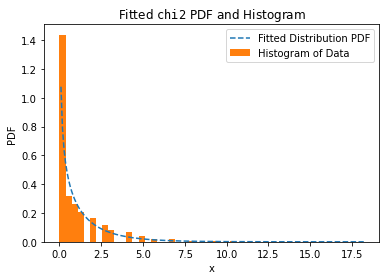

  params: FitParams(df=1.2292522749582322, loc=0.0, scale=1.0)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.'


In [63]:
dist = stats.chi2
bounds = [(0,320)]
res = stats.fit(dist, t_μ, bounds)
res.plot()
plt.show()
print(res)

In [72]:
### Now calculate the p value of the observed value
L_01 = comb(number_of_trials,observed_heads)*H_0**observed_heads*(1-H_0)**(number_of_trials-observed_heads)  
H_prof = observed_heads/number_of_trials
L_1 = comb(number_of_trials,observed_heads)*(H_prof**observed_heads)*(1-H_prof)**(number_of_trials-observed_heads)
λ_μ = L_01/L_1
t_data = -2*np.log(λ_μ)

print(t_data)

119.02161345604266


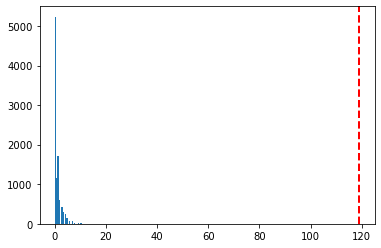

In [73]:
plt.hist(t_μ, bins=40,range = (0,20))
plt.axvline(x=t_data, color='r', linestyle='--', linewidth=2, label=f't_data = {t_μ}')
plt.show()

In [74]:
### calculate p-value

# Calculate the histogram
counts, bin_edges = np.histogram(t_μ, bins=nbins, range=(lowrange, highrange))

# Find the bin index where the vertical line intersects
bin_index = np.digitize(t_data, bin_edges) - 1

# Sum the counts to the right of the line
area_right = np.sum(counts[bin_index:])
total_area = np.sum(counts)

# Calculate the fraction
fraction_area_right = area_right / total_area

print(f"p value is {fraction_area_right}")

p value is 0.0
